In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

# Load the IMDB dataset from Keras (vocab_size = 10000 most frequent words)
vocab_size = 10000
max_len = 200  # Maximum length of each review

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure they all have the same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 200)
Test data shape: (25000, 200)


In [ ]:
# Padding sequences so they are of the same length
max_len = 200  # Maximum sequence length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print(f"Shape of training data: {x_train.shape}")
print(f"Shape of test data: {x_test.shape}")


Shape of training data: (25000, 200)
Shape of test data: (25000, 200)


In [ ]:
# Define the RNN Model with an Embedding Layer
model = Sequential()

# Embedding Layer: Turns positive integers into dense vectors of fixed size (100)
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len))

# Simple RNN Layer: This is the core layer of the model
model.add(SimpleRNN(units=128, activation='tanh', return_sequences=False))

# Dense Layer: Fully connected layer with a single output for binary classification (positive/negative)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss (since it's a binary classification problem)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Accuracy: {test_acc}")


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 164ms/step - accuracy: 0.5517 - loss: 0.6748 - val_accuracy: 0.6854 - val_loss: 0.5780
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 156ms/step - accuracy: 0.7301 - loss: 0.5449 - val_accuracy: 0.7172 - val_loss: 0.5533
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 155ms/step - accuracy: 0.7673 - loss: 0.4753 - val_accuracy: 0.5476 - val_loss: 0.7178
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 157ms/step - accuracy: 0.6704 - loss: 0.5991 - val_accuracy: 0.6349 - val_loss: 0.6404
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 156ms/step - accuracy: 0.7197 - loss: 0.5249 - val_accuracy: 0.6417 - val_loss: 0.6268
782/782 - 14s - 18ms/step - accuracy: 0.6417 - loss: 0.6268
Test Accuracy: 0.6416800022125244


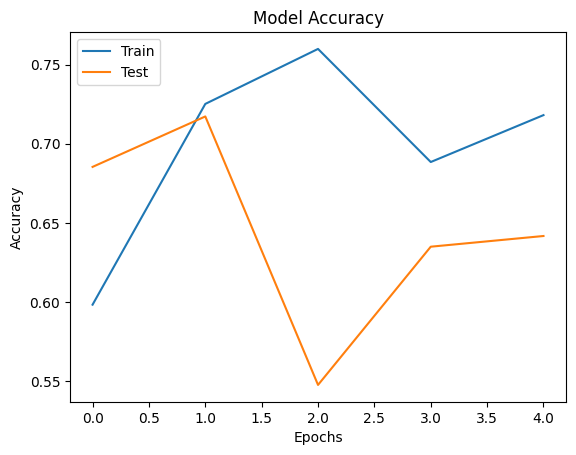

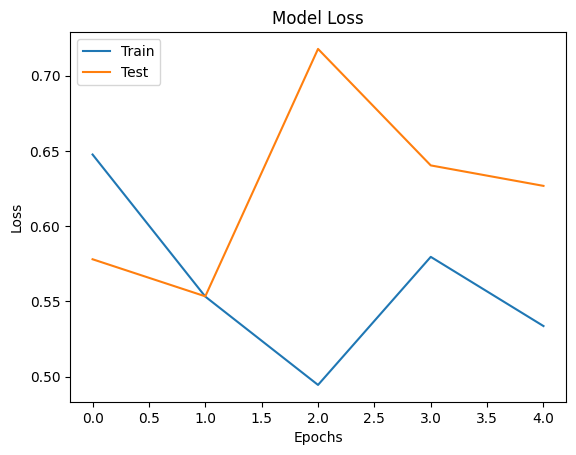

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
